In [1]:
#Download any necessary datasets & dependencies, only need to do this once
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en_core_web_lg
#!{sys.executable} -m pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
#!{sys.executable} -m pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install requests
#!{sys.executable} -m pip install matplotlib

#Installing dependencies for classify_abs.py
#!{sys.executable} -m pip install tensorflow
#!{sys.executable} -m pip install nltk
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

import numpy as np
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import spacy
import time
import datetime
from collections import OrderedDict
import matplotlib.pyplot as plt; plt.rcdefaults()

2021-07-22 10:46:00.573621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-22 10:46:00.573645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('whole_abstract_set.csv')

In [3]:
df.tail()

,disease,pmid,abstract,epi_prob,is_epi
9279,Cogan-Reese syndrome,33300272,Various methods have been described to treat n...,0.010466,False
9280,Cogan-Reese syndrome,33530790,<h4>Objective</h4>To assess the therapeutic ef...,0.014457,False
9281,Cogan-Reese syndrome,33985356,Mayer-Rokitansky-Kuster-Hauser (MRKH) syndrome...,0.402330,False
9282,Cogan-Reese syndrome,33898257,Mayer-Rokitansky-Küster-Hauser (MRKH) syndrome...,0.012231,False
9283,Cogan-Reese syndrome,33461758,<h4>Objective</h4>To introduce the minimally i...,0.014154,False


In [4]:
#create a dictionary of {disease name, number of epidemiological studies}
dz_num = {}
for row in df.iterrows():
    if row[1][4]: #is_epi bool returned
        if row[1][0] in dz_num.keys(): #Check if disease name is in dictionary
            dz_num[row[1][0]]+=1
        else:
            dz_num[row[1][0]] = 1
    elif row[1][0] not in dz_num.keys():
            dz_num[row[1][0]] = 0

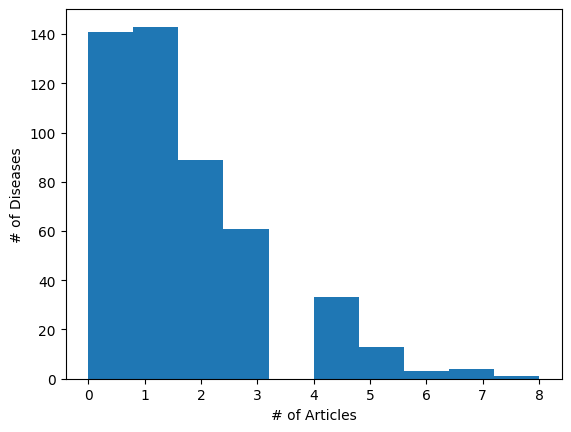

In [5]:
#Plot the figure
objects = tuple(dz_num)
performance = list(dz_num.values())

fig = plt.figure()
plt.ylabel('# of Diseases')
plt.xlabel('# of Articles')
plt.hist(performance)

plt.show()

In [6]:
fig.savefig('DiseaseSampleEpi_Hist.png', dpi=400, bbox_inches='tight')

In [7]:
zero, one, two, three, fourplus =0,0,0,0,0
for k, v in dz_num.items():
        if v>=4:
            fourplus+=1
        elif v==3:
            three+=1
        elif v==2:
            two+=1
        elif v==1:
            one+=1
        elif v==0:
            zero+=1

In [8]:
print(zero)
print(one)
print(two)
print(three)
print(fourplus)

141
143
89
61
54


In [11]:
zero, one, two, three, four, fiveplus =0,0,0,0,0,0
for k, v in dz_num.items():
        if v>=5:
            fiveplus+=1
        elif v==4:
            four+=1
        elif v==3:
            three+=1
        elif v==2:
            two+=1
        elif v==1:
            one+=1
        elif v==0:
            zero+=1

In [14]:
print(zero)
print(one)
print(two)
print(three)
print(four)
print(fiveplus)
print(str((500-fiveplus)/5)+" percent of diseases have less than 5 epidemiological studies")

141
143
89
61
33
21
95.8 percent of diseases have less than 5 epidemiological studies
